## Value Investor

In [1]:
#Import the libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA 
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

#importing functions and parameters files
from functions import preprocess_dataframe, plot_stock_data, draw_boxplots, linear_regression_forecast
from functions import arima, sarimax_forecast

In [2]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
# Display the columns
russia.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,291.02,294,294.42,290.26,47.00M,-0.0076
1,2021-03-30 00:00:00,293.25,294.86,295.72,291.5,38.81M,-0.0002
2,2021-03-29 00:00:00,293.3,289.72,294.09,289.26,43.68M,0.0071
3,2021-03-26 00:00:00,291.22,288.63,292.75,288.32,56.07M,0.0159
4,2021-03-25 00:00:00,286.66,286.5,287.03,283.85,35.22M,0.0030


In [3]:
russia.shape

(312, 7)

In [4]:
russia.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [5]:
russia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      312 non-null    object 
 1   Price     312 non-null    object 
 2   Open      312 non-null    object 
 3   High      312 non-null    object 
 4   Low       312 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
dtypes: float64(1), object(6)
memory usage: 17.2+ KB


In [6]:
#Check index type
russia.index.dtype

dtype('int64')

In [7]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
turkey=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Turkey - Koc Holding AS (KCHOL)', parse_dates = True)
# Display the columns
turkey.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,19.41,19.42,19.63,19.27,13.14M,-0.0046
1,2021-03-30 00:00:00,19.5,19.12,19.81,19.03,21.05M,0.0209
2,2021-03-29 00:00:00,19.1,19.24,19.67,19.1,16.56M,-0.0078
3,2021-03-26 00:00:00,19.25,20.28,20.36,19.1,21.35M,-0.0385
4,2021-03-25 00:00:00,20.02,20.5,20.86,20.02,15.93M,-0.0148


In [8]:
turkey.shape

(316, 7)

In [9]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
egypt=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Egypt - Medinet Nasr Housing (M', parse_dates = True)
# Display the columns
egypt.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,3.75,3.74,3.82,3.71,1.57M,0.0054
1,2021-03-30 00:00:00,3.73,3.71,3.76,3.67,3.43M,0.0081
2,2021-03-29 00:00:00,3.7,3.69,3.73,3.68,1.25M,-0.0027
3,2021-03-28 00:00:00,3.71,3.76,3.76,3.68,2.34M,0.0000
4,2021-03-25 00:00:00,3.71,3.62,3.78,3.59,2.50M,0.0137


In [10]:
egypt.shape

(306, 7)

In [11]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
brazil=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Brazil - Minerva SABrazil (BEEF', parse_dates = True)
# Display the columns
brazil.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,10.2,10.35,10.4,10.12,7.77M,-0.0154
1,2021-03-30 00:00:00,10.36,10.41,10.62,10.3,9.93M,-0.0105
2,2021-03-29 00:00:00,10.47,9.85,10.5,9.81,22.04M,0.0651
3,2021-03-26 00:00:00,9.83,9.8,9.94,9.7,5.11M,0.0031
4,2021-03-25 00:00:00,9.8,10.01,10.01,9.66,8.88M,-0.0151


In [12]:
brazil.shape

(310, 7)

In [13]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
argentina=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Argentina - Pampa Energia SA (P', parse_dates = True)
# Display the columns
argentina.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,85.15,86.5,88.1,85.15,564.30K,-0.0110
1,2021-03-30 00:00:00,86.1,85.15,86.75,84.6,141.40K,0.0129
2,2021-03-29 00:00:00,85,80,86,79,371.22K,0.0385
3,2021-03-26 00:00:00,81.85,84,84.6,80.7,462.55K,-0.0209
4,2021-03-25 00:00:00,83.6,85.2,87.3,82.1,389.78K,-0.0313


In [14]:
argentina.shape

(301, 7)

In [15]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
colombia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Colombia - Cementos Argos SA (C', parse_dates = True)
# Display the columns
colombia.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,5150,5100,5170,5100,212.44K,0.0098
1,2021-03-30 00:00:00,5100,5010,5100,5010,583.70K,0.0109
2,2021-03-29 00:00:00,5045,5020,5045,5015,117.54K,0.0050
3,2021-03-26 00:00:00,5020,5085,5085,4980,203.46K,-0.0020
4,2021-03-25 00:00:00,5030,5035,5045,4950,317.06K,0.0010


In [16]:
colombia.shape

(304, 7)

In [17]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
safrica=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Africa - Impala Platinum ', parse_dates = True)
# Display the columns
safrica.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,27373,26980,27526,26657,2.49M,0.0177
1,2021-03-30 00:00:00,26898,26766,27443,26360,3.02M,-0.0030
2,2021-03-29 00:00:00,26980,27800,28174,26614,4.44M,-0.0201
3,2021-03-26 00:00:00,27533,27083,28006,26728,3.36M,0.0365
4,2021-03-25 00:00:00,26564,25954,27128,25954,2.83M,0.0255


In [18]:
safrica.shape

(315, 7)

In [19]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
skorea=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Korea - Dongkuk Steel Mil', parse_dates = True)
# Display the columns
skorea.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,13650,13700,13750,13450,0.19K,0.0000
1,2021-03-30 00:00:00,13650,13850,14200,13050,3.17M,0.0074
2,2021-03-29 00:00:00,13550,12500,13800,12500,0.20K,0.1107
3,2021-03-28 00:00:00,12200,12200,12200,12200,-,0.0000
4,2021-03-26 00:00:00,12200,11500,12300,11350,2.34M,0.0796


In [20]:
skorea.shape

(342, 7)

##### Data Exploration

In [21]:
russia=preprocess_dataframe(russia)
russia.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2020-01-03,255.00,255.99,258.19,253.7,35.85M,0.0010,2020,1
1,2020-01-06,253.90,254.75,254.84,251.4,22.35M,-0.0043,2020,1
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,0.0207,2020,1
3,2020-01-09,257.99,259.4,261.76,257.01,38.33M,-0.0045,2020,1
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.0008,2020,1


In [22]:
#Do the same for all dataframes
turkey = preprocess_dataframe(turkey)
turkey.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2020-01-02,20.38,20.42,20.44,20.24,2.53M,0.0030,2020,1
1,2020-01-03,20.30,20.3,20.44,19.97,3.31M,-0.0039,2020,1
2,2020-01-06,20.08,20.34,20.34,19.97,1.94M,-0.0108,2020,1
3,2020-01-07,19.93,20.22,20.28,19.92,2.89M,-0.0075,2020,1
4,2020-01-08,19.94,19.89,19.95,19.66,2.79M,0.0005,2020,1


In [23]:
egypt = preprocess_dataframe(egypt)
egypt.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2020-01-02,4.81,4.81,4.87,4.78,241.60K,-0.0021,2020,1
1,2020-01-05,4.41,4.7,4.7,4.33,3.76M,-0.0832,2020,1
2,2020-01-06,4.28,4.16,4.44,4.12,2.52M,-0.0295,2020,1
3,2020-01-08,4.41,4.19,4.59,4.15,3.52M,0.0304,2020,1
4,2020-01-09,4.62,4.55,4.7,4.55,2.09M,0.0476,2020,1


In [24]:
brazil = preprocess_dataframe(brazil)
brazil.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2020-01-02,12.57,12.88,12.99,12.57,5.78M,-0.0210,2020,1
1,2020-01-03,12.90,12.45,12.93,12.27,4.88M,0.0263,2020,1
2,2020-01-06,12.89,12.9,12.91,12.57,4.17M,-0.0008,2020,1
3,2020-01-07,13.48,13.03,13.48,13.03,8.20M,0.0458,2020,1
4,2020-01-08,13.63,13.5,13.68,13.18,6.18M,0.0111,2020,1


In [25]:
argentina = preprocess_dataframe(argentina)
argentina.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2020-01-02,48.25,49.35,50.2,47.55,878.50K,-0.0292,2020,1
1,2020-01-03,48.80,48.25,49.45,46.5,595.36K,0.0114,2020,1
2,2020-01-06,48.50,48.4,48.7,47,719.24K,-0.0061,2020,1
3,2020-01-07,47.60,48.35,49,46.9,901.95K,-0.0186,2020,1
4,2020-01-08,46.50,47.5,47.5,46,1.18M,-0.0231,2020,1


In [26]:
colombia = preprocess_dataframe(colombia)
colombia.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2020-01-02,7120.0,7300,7300,7120,138.96K,-0.0247,2020,1
1,2020-01-03,7000.0,7040,7100,6960,470.77K,-0.0169,2020,1
2,2020-01-07,6950.0,6950,6950,6850,168.71K,-0.0071,2020,1
3,2020-01-08,6880.0,6940,6950,6880,84.93K,-0.0101,2020,1
4,2020-01-09,6810.0,6880,6890,6800,262.89K,-0.0102,2020,1


In [27]:
safrica = preprocess_dataframe(safrica)
safrica.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2020-01-02,14330.0,14525,14764,14325,2.01M,-0.0015,2020,1
1,2020-01-03,14843.0,14700,14884,14360,3.19M,0.0358,2020,1
2,2020-01-06,14620.0,14985,15045,14574,2.61M,-0.0150,2020,1
3,2020-01-07,14500.0,14688,14688,13940,3.94M,-0.0082,2020,1
4,2020-01-08,15290.0,14775,15465,14468,6.24M,0.0545,2020,1


In [28]:
skorea = preprocess_dataframe(skorea)
skorea.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2020-01-02,5850.0,5930,5980,5820,239.90K,-0.0168,2020,1
1,2020-01-03,5900.0,5870,5920,5830,230.40K,0.0085,2020,1
2,2020-01-06,5730.0,5890,5890,5680,319.88K,-0.0288,2020,1
3,2020-01-07,5690.0,5740,5770,5650,303.89K,-0.0070,2020,1
4,2020-01-08,5430.0,5640,5640,5390,524.10K,-0.0457,2020,1


##### Data Visualization

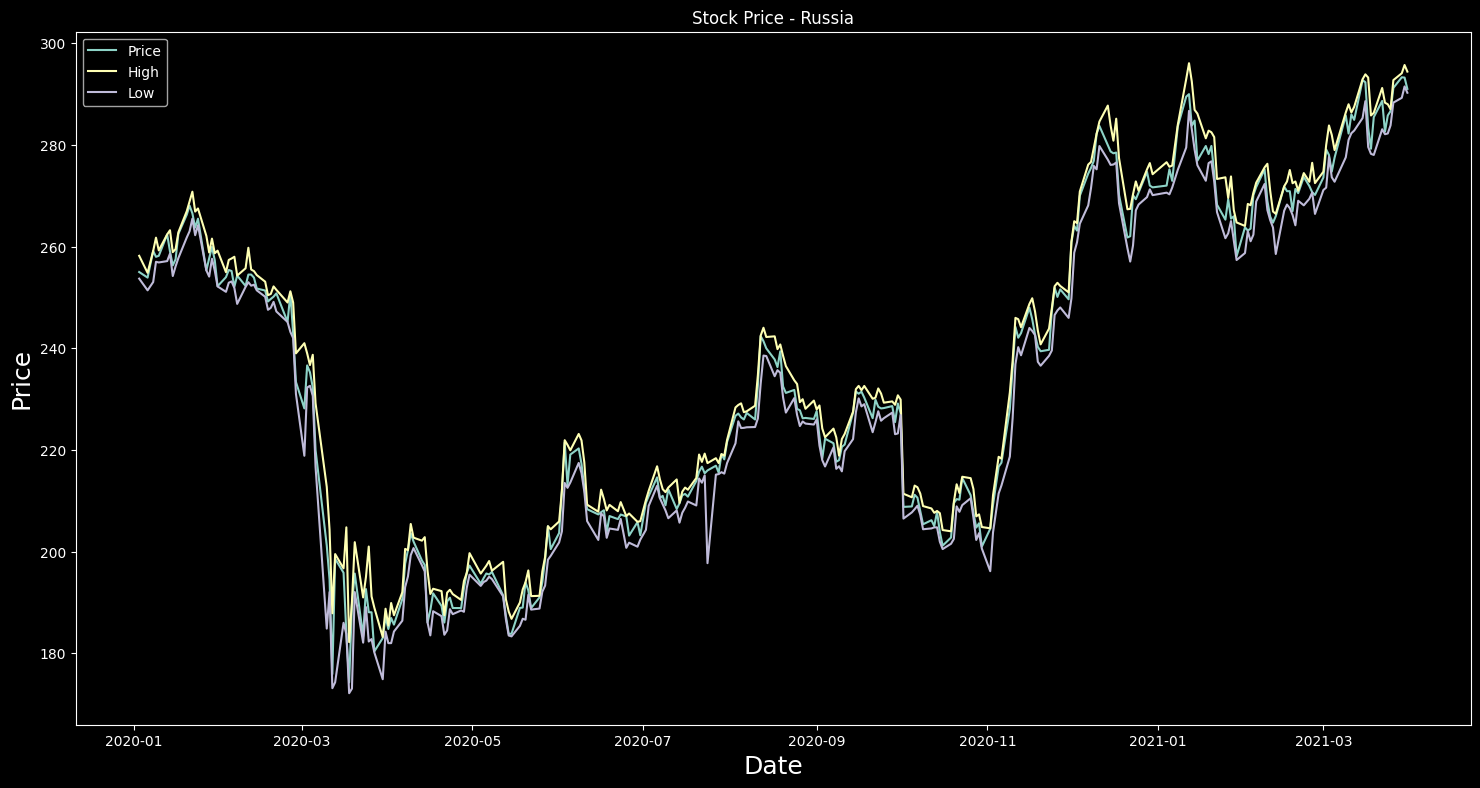

In [29]:
plot_stock_data(russia, "Russia")

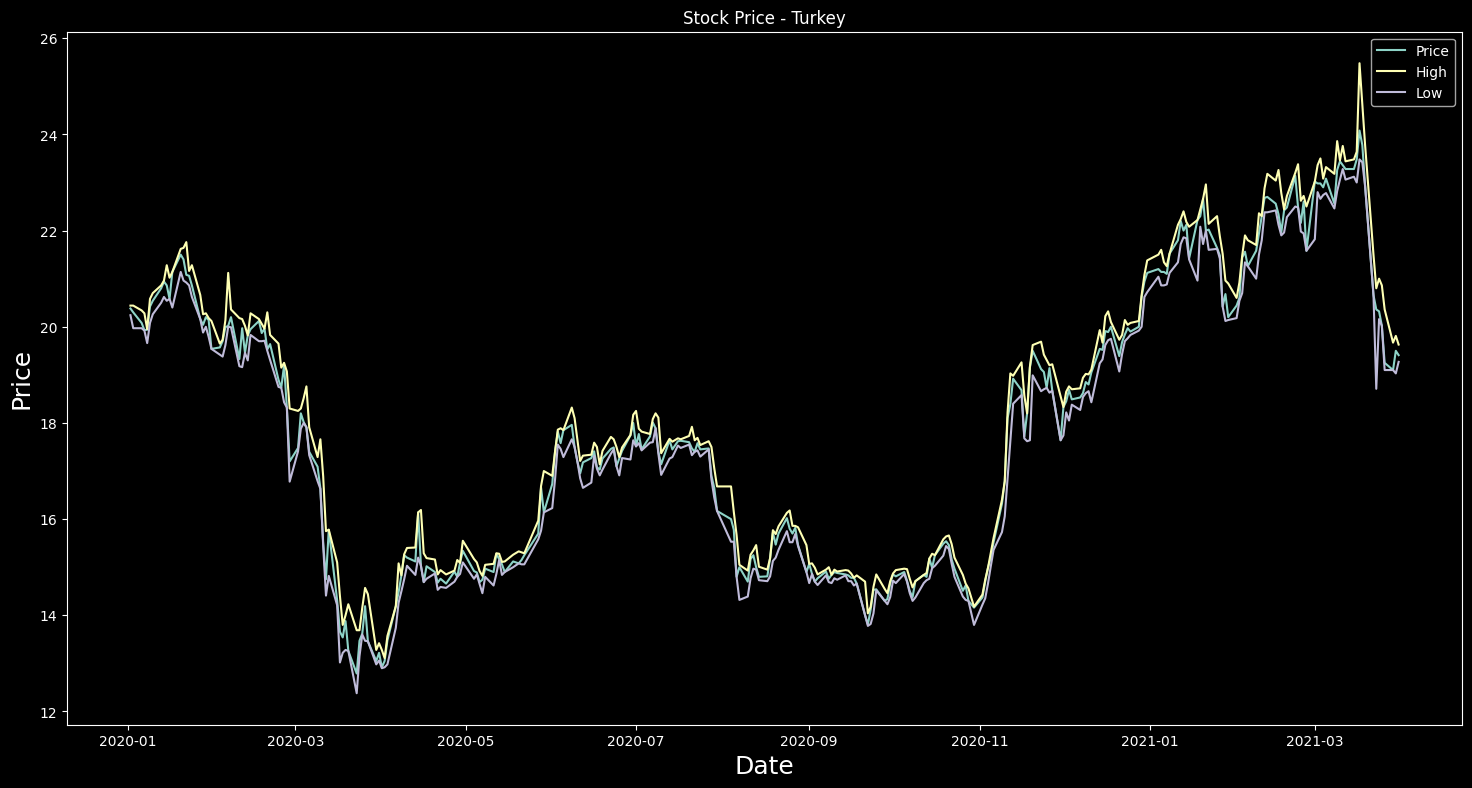

In [30]:
plot_stock_data(turkey, "Turkey")

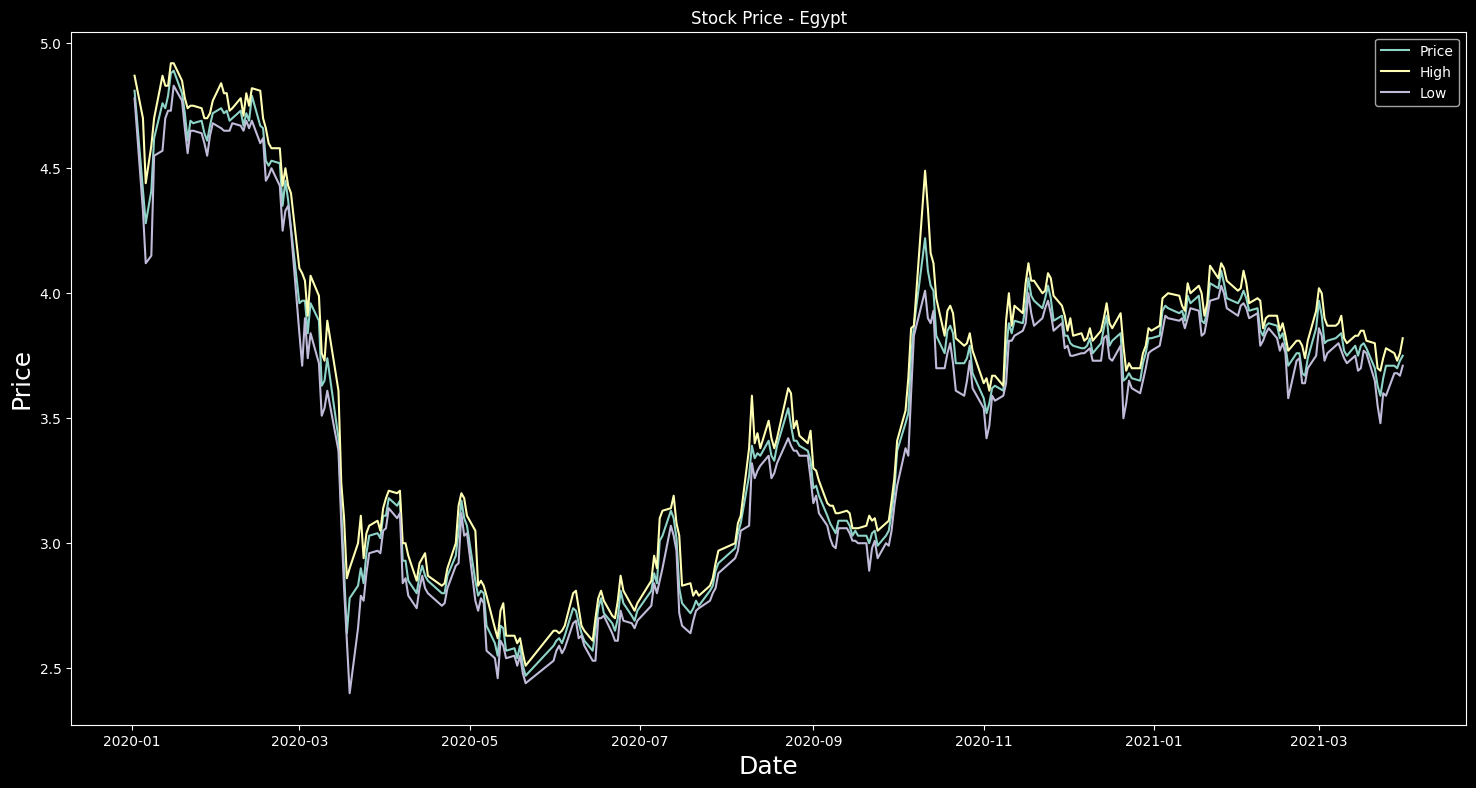

In [31]:
plot_stock_data(egypt, "Egypt")

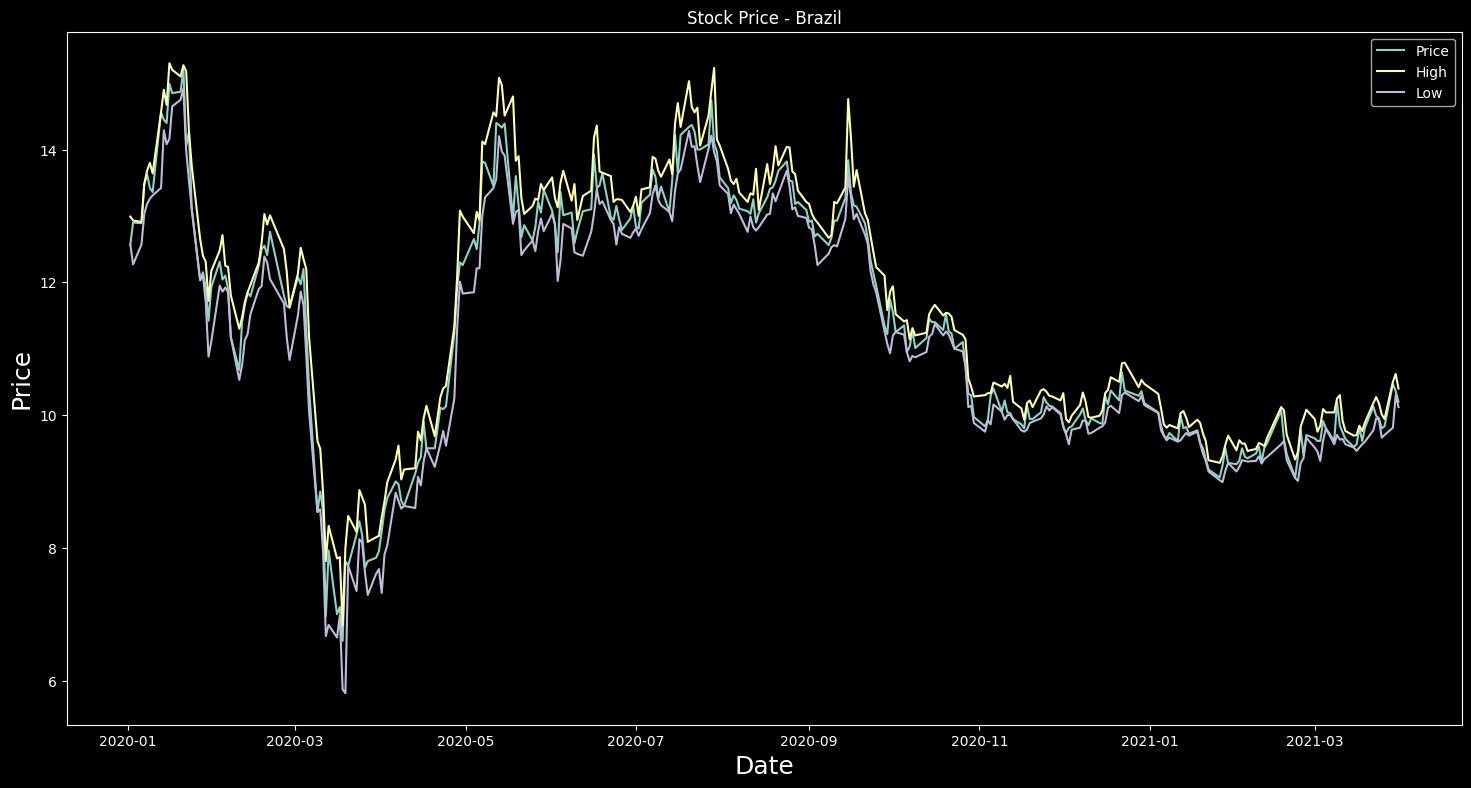

In [32]:
plot_stock_data(brazil, "Brazil")

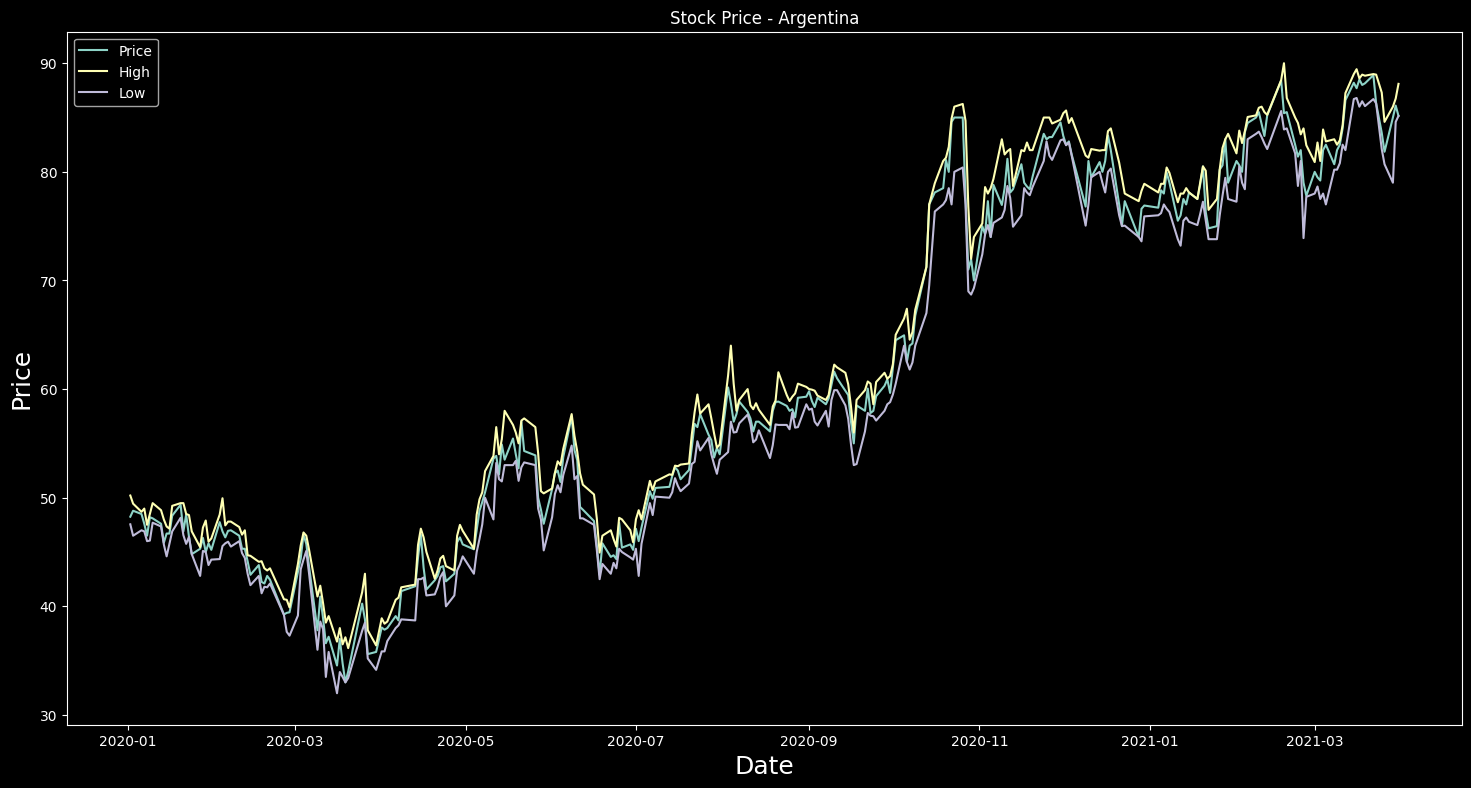

In [33]:
plot_stock_data(argentina, "Argentina")

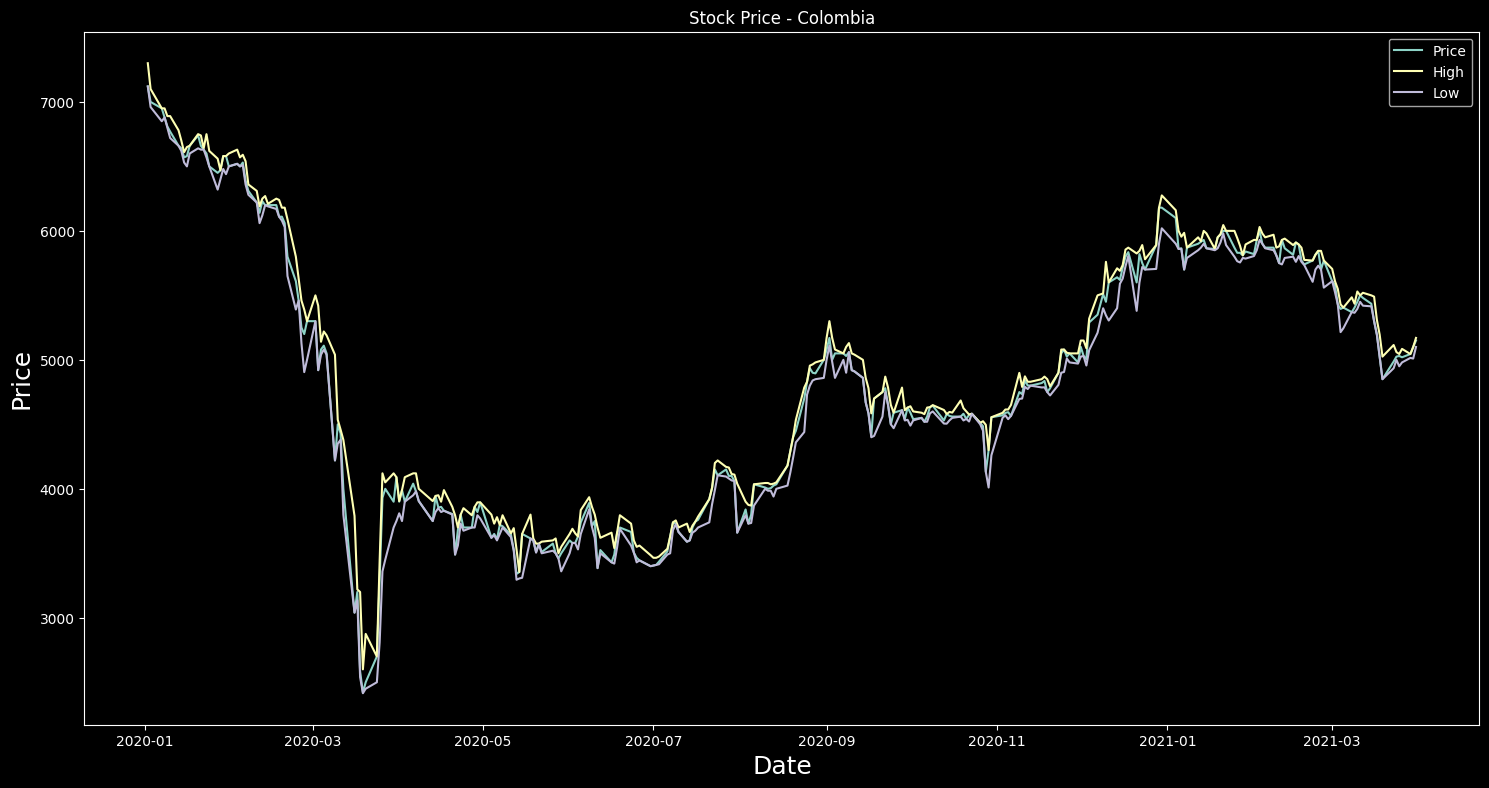

In [34]:
plot_stock_data(colombia, "Colombia")

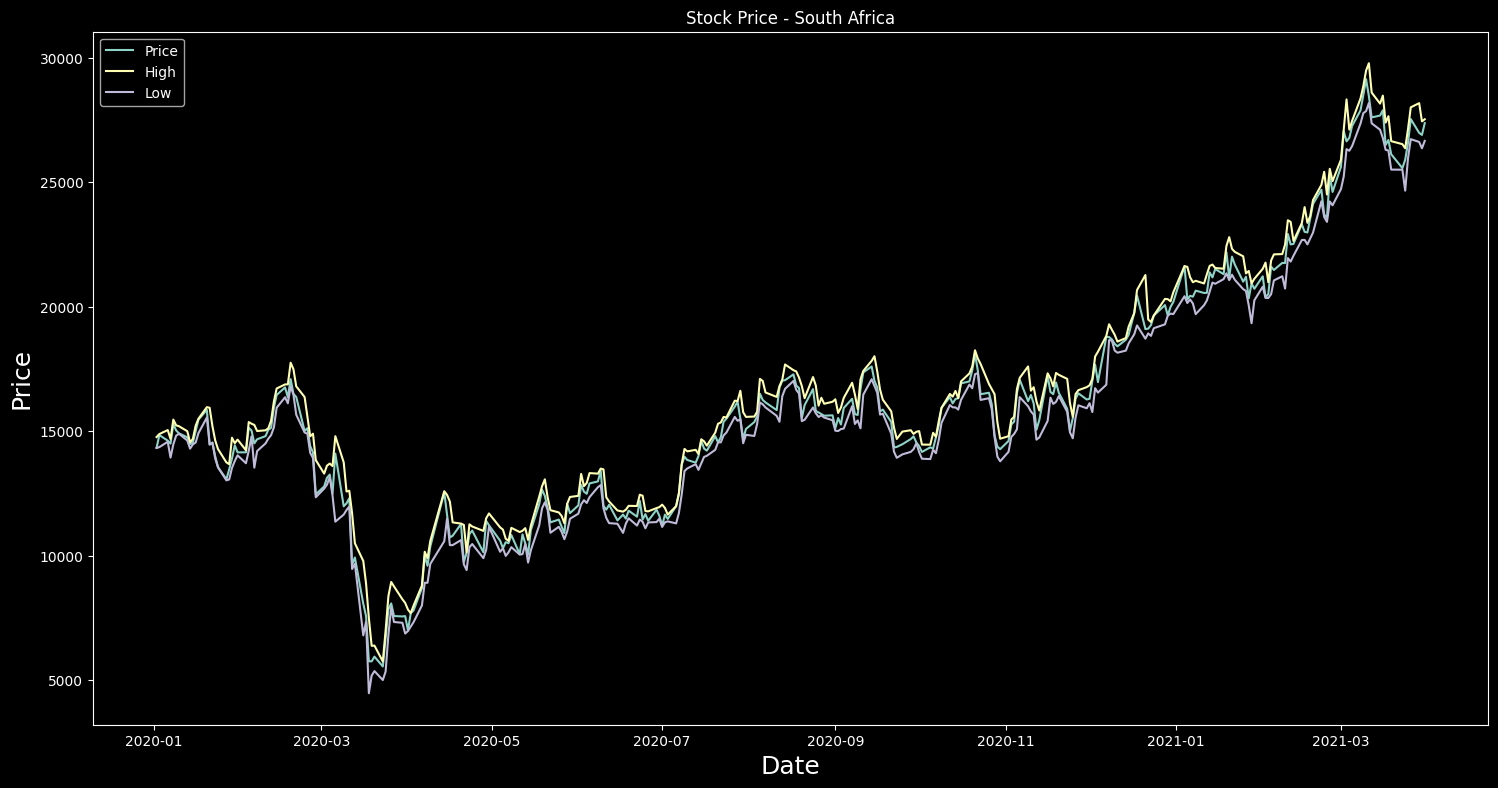

In [35]:
plot_stock_data(safrica, "South Africa")

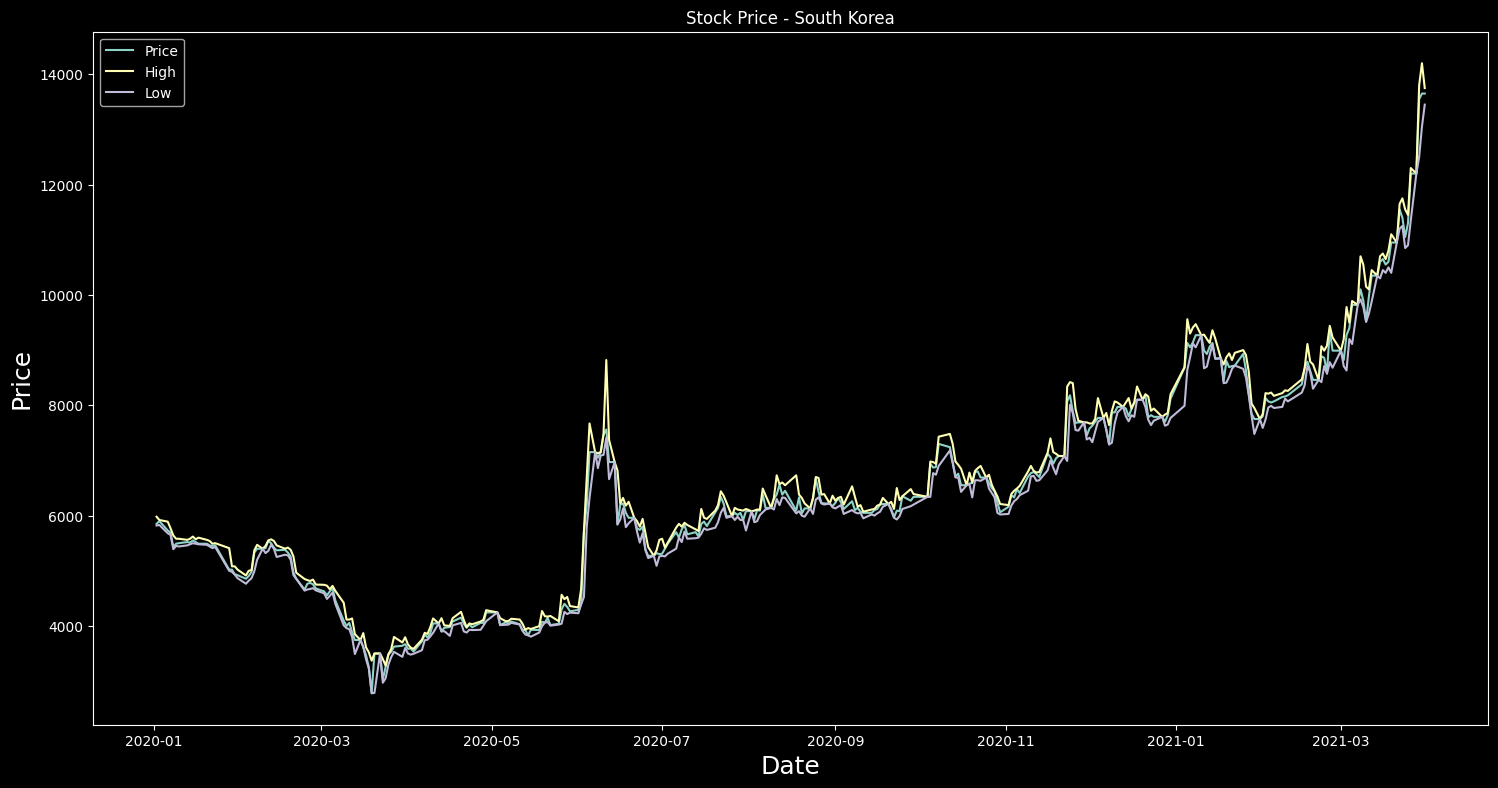

In [36]:
plot_stock_data(skorea, "South Korea")

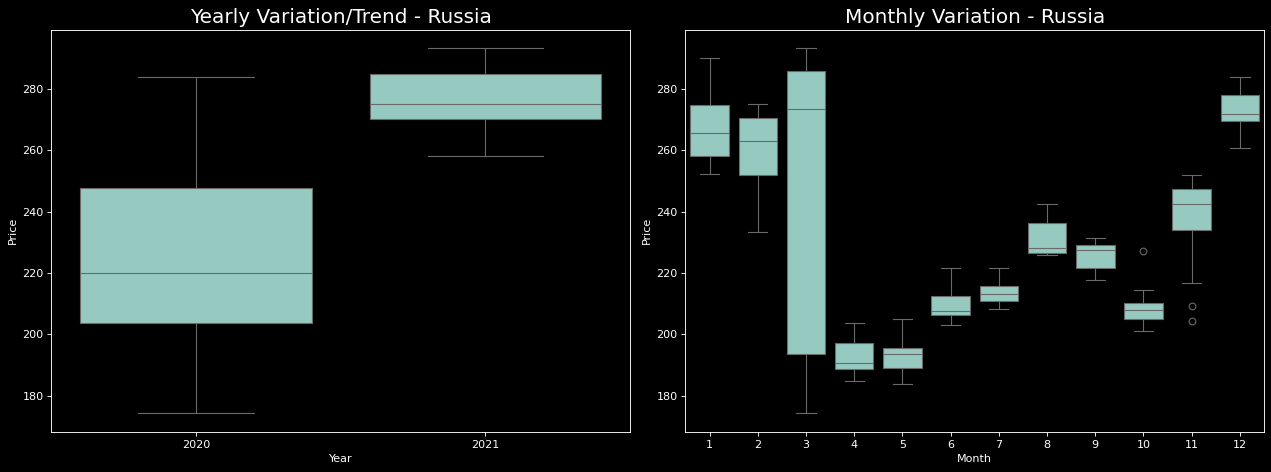

In [37]:
draw_boxplots(russia, "Russia")

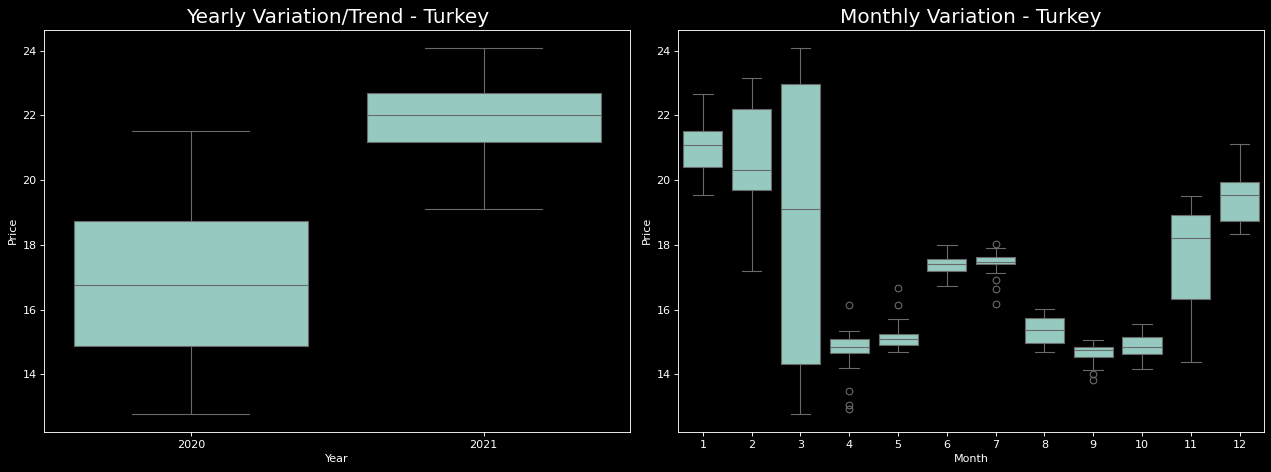

In [38]:
draw_boxplots(turkey, "Turkey")

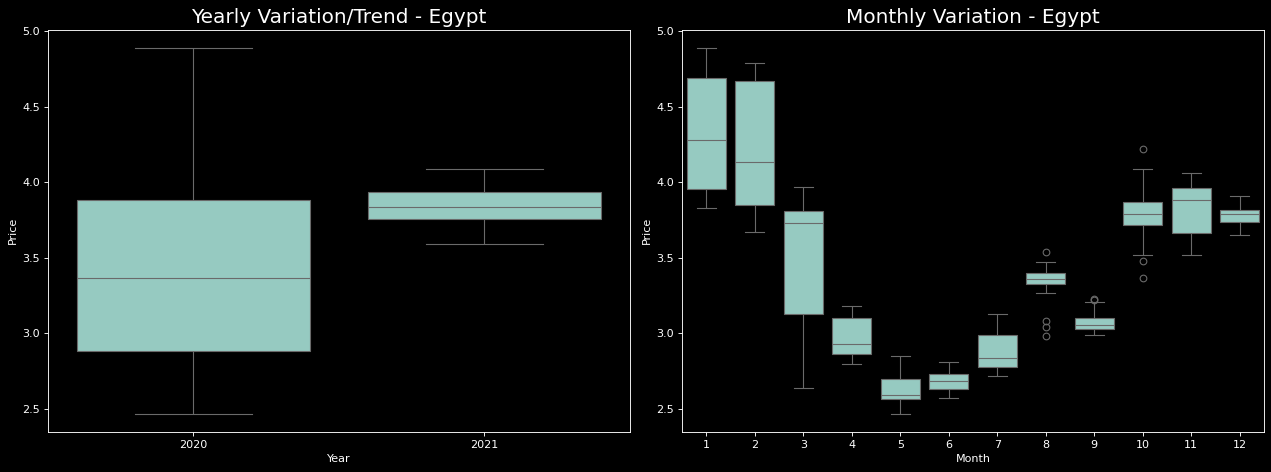

In [39]:
draw_boxplots(egypt, "Egypt")

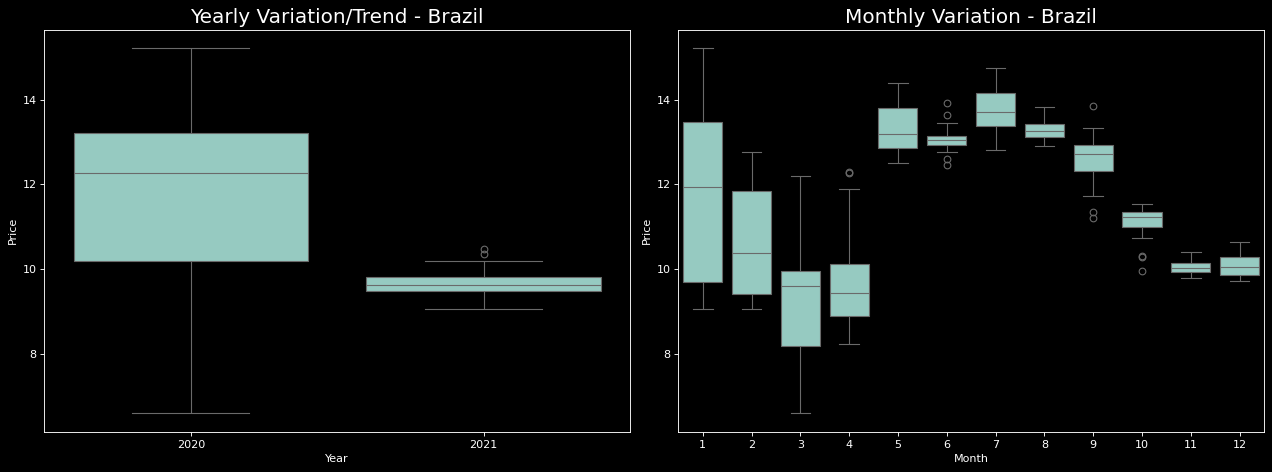

In [40]:
draw_boxplots(brazil, "Brazil")

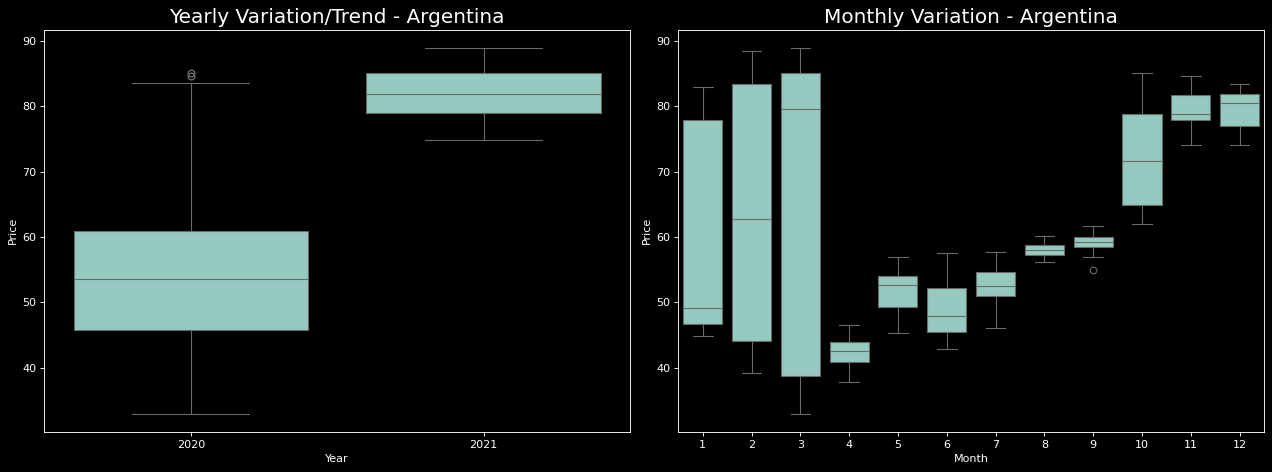

In [41]:
draw_boxplots(argentina, "Argentina")

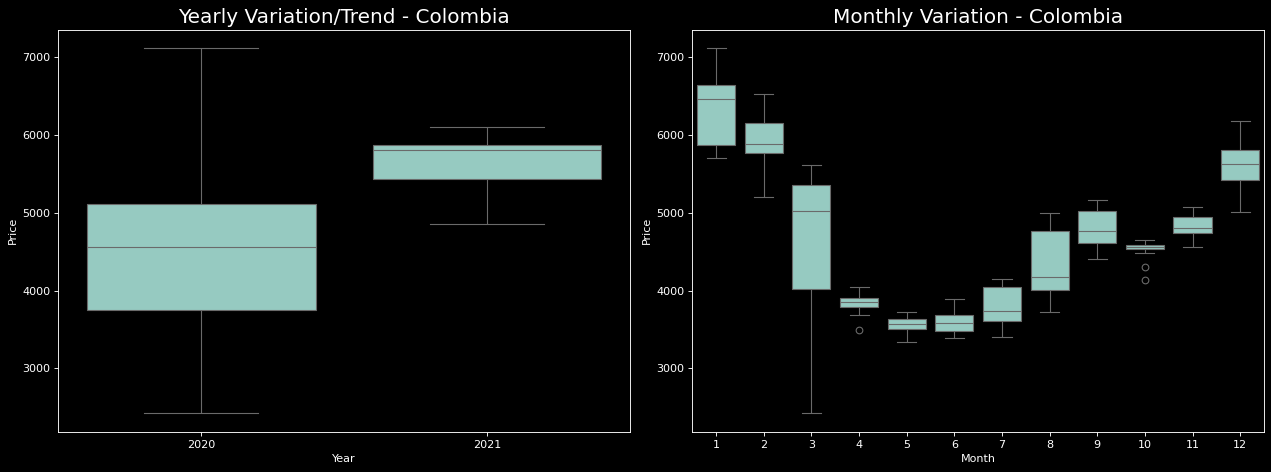

In [42]:
draw_boxplots(colombia, "Colombia")

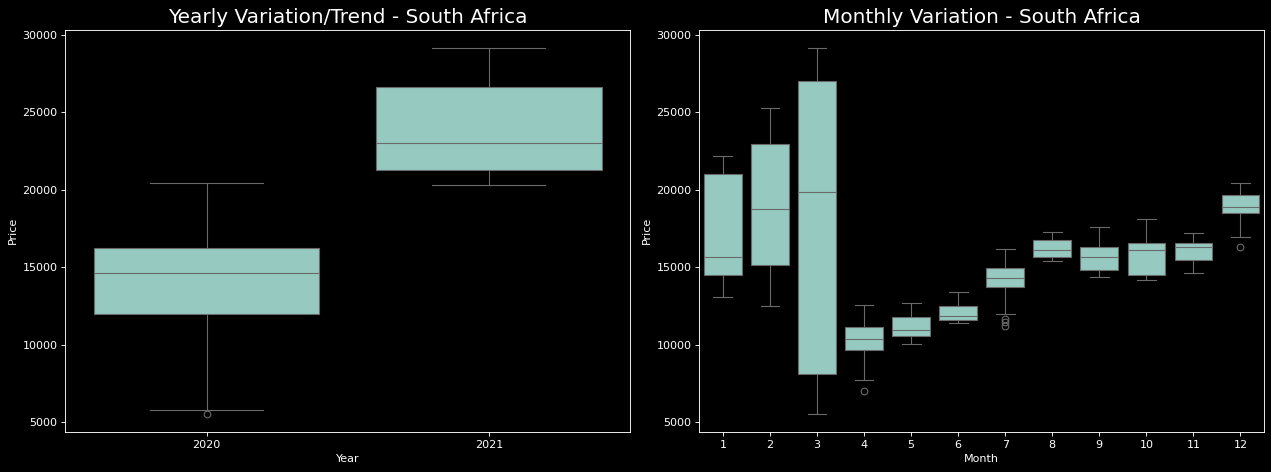

In [43]:
draw_boxplots(safrica, "South Africa")

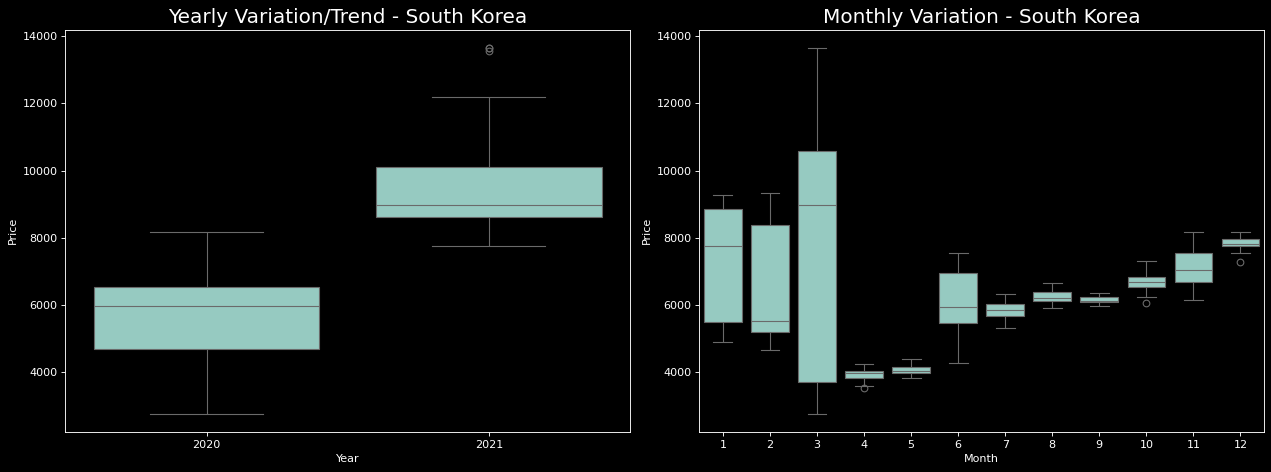

In [44]:
draw_boxplots(skorea, "South Korea")

##### Data Modeling

##### Linear Regression, ARIMA, SARIMAX, fbprophet, Keras LSTM

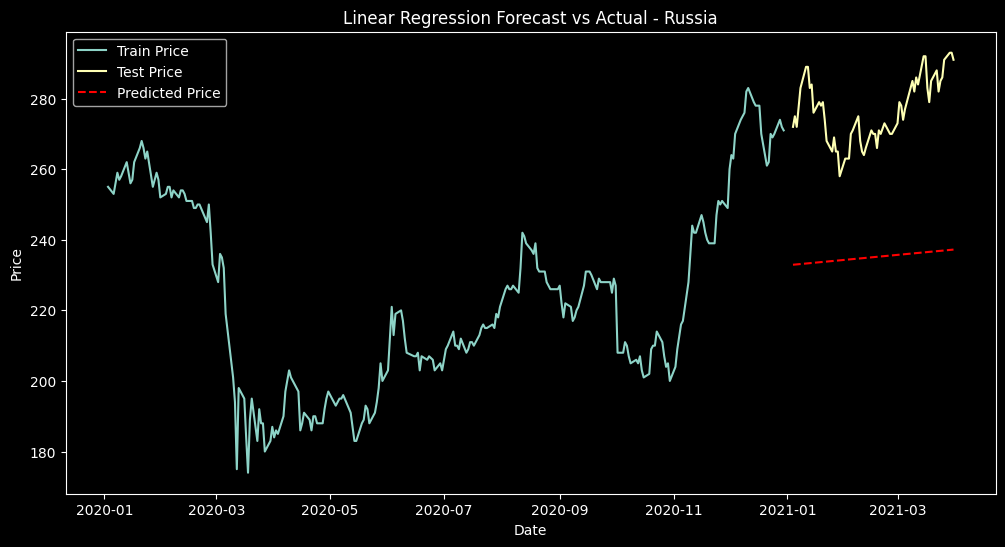

Mean Squared Error: 1769.3397175556495
R^2 Score: -20.307618158301306


In [45]:
linear_regression_forecast(russia, "Russia")

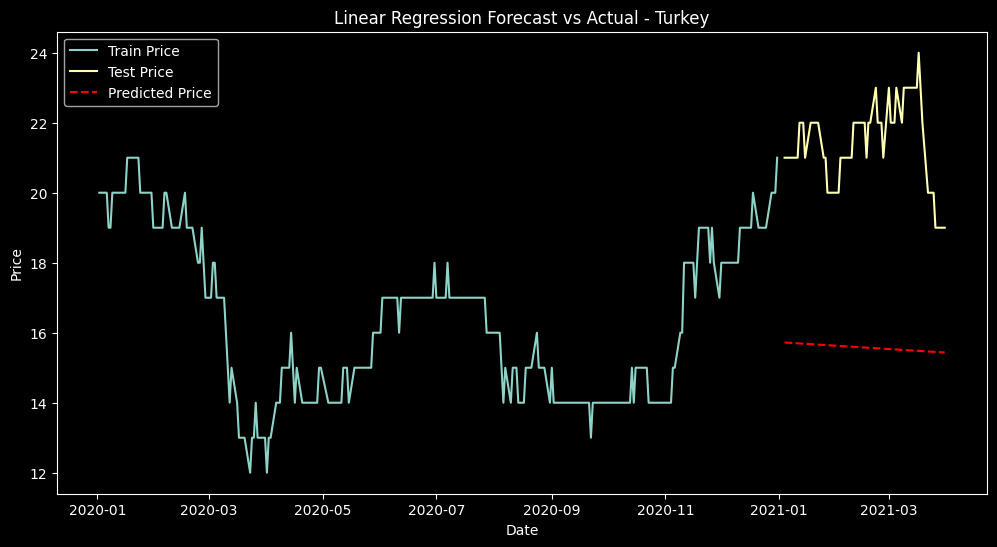

Mean Squared Error: 35.93094611171477
R^2 Score: -26.060706853395818


In [46]:
linear_regression_forecast(turkey, "Turkey")

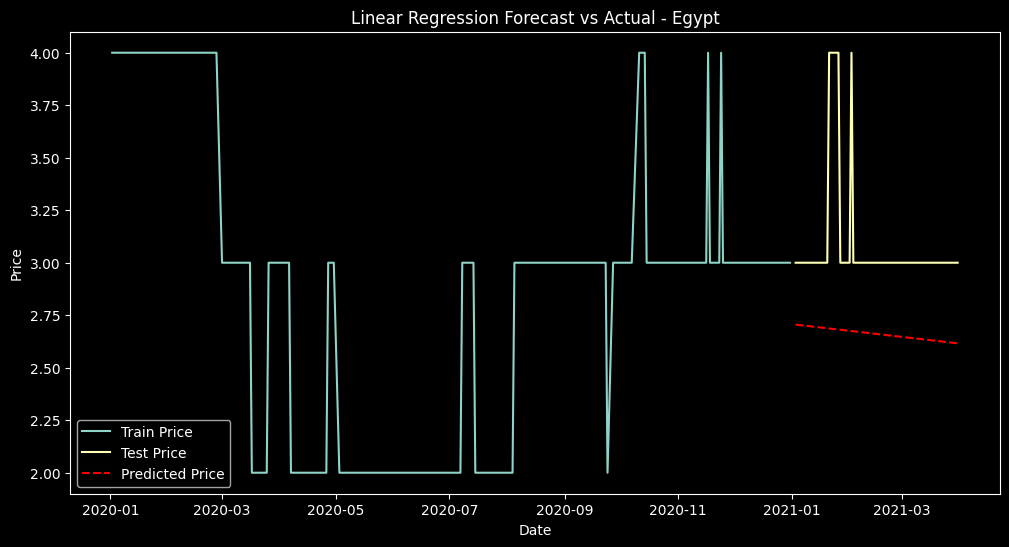

Mean Squared Error: 0.24822734004755978
R^2 Score: -2.3480206847116496


In [47]:
linear_regression_forecast(egypt, "Egypt")

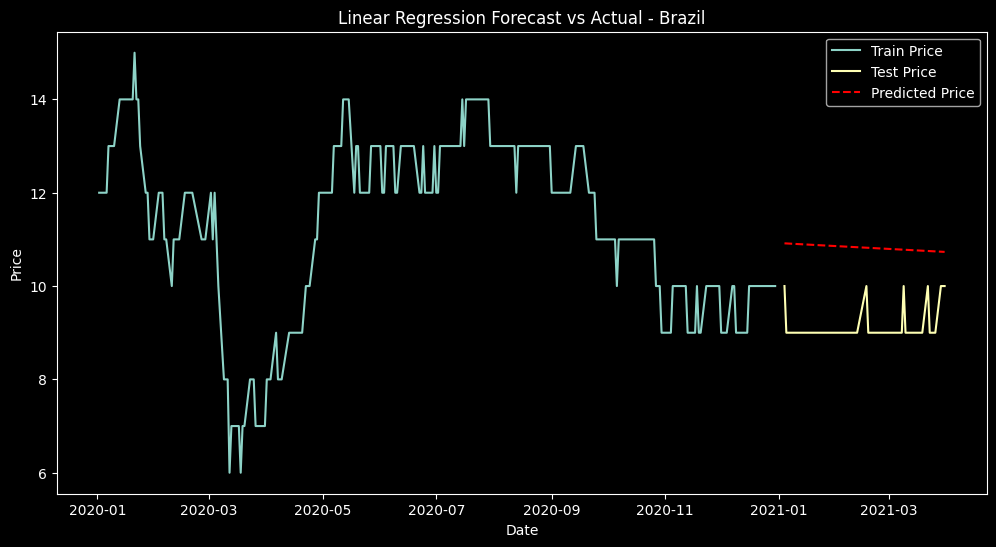

Mean Squared Error: 3.0302554377280564
R^2 Score: -28.404095891700813


In [48]:
linear_regression_forecast(brazil, "Brazil")

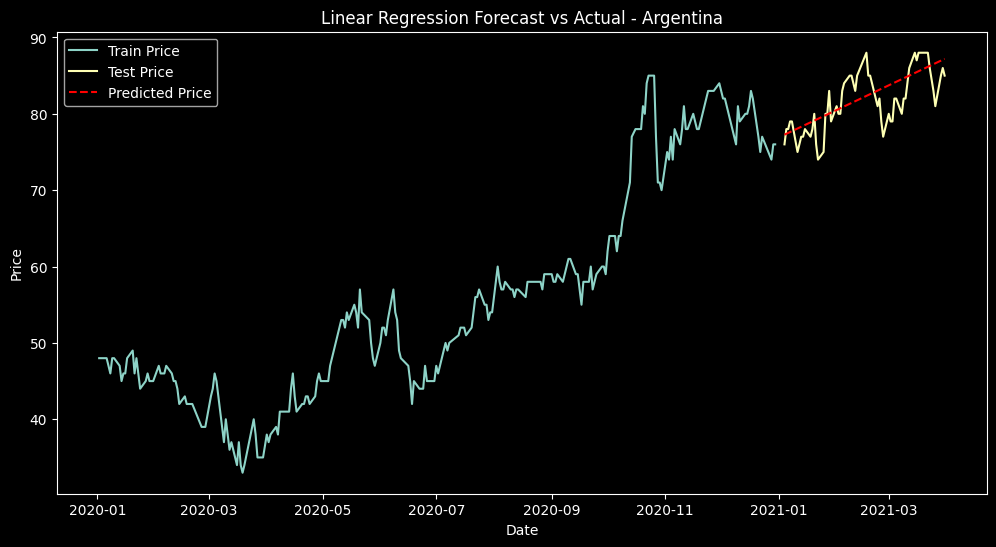

Mean Squared Error: 7.677958688379638
R^2 Score: 0.4734211335625783


In [49]:
linear_regression_forecast(argentina, "Argentina")

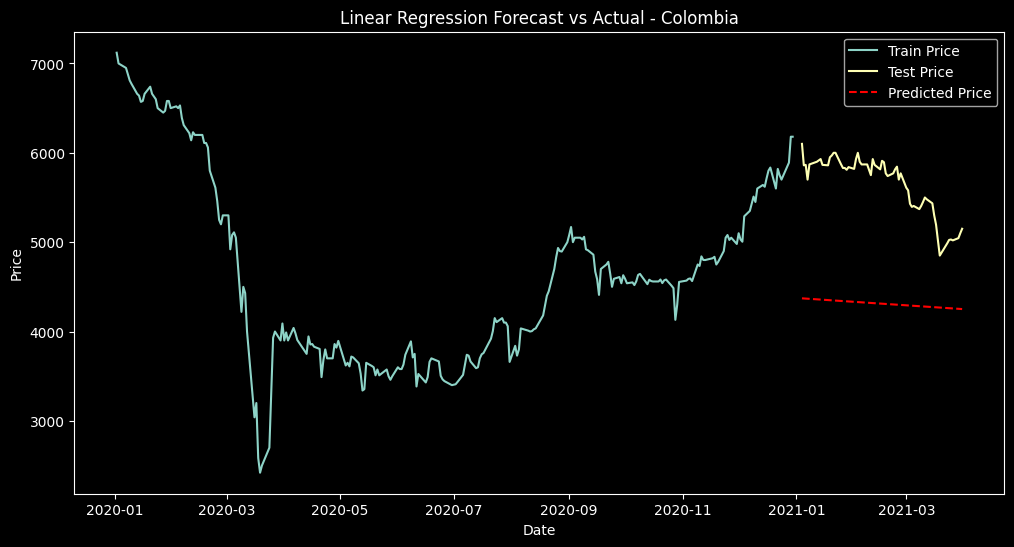

Mean Squared Error: 1871805.1470824948
R^2 Score: -16.749467648238184


In [50]:
linear_regression_forecast(colombia, "Colombia")

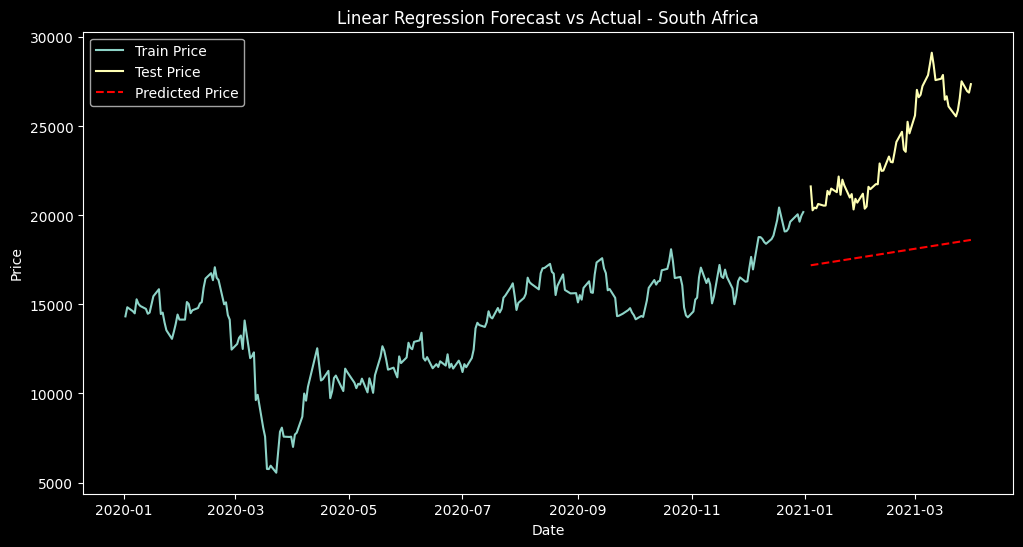

Mean Squared Error: 40113212.56238133
R^2 Score: -4.243344868494063


In [51]:
linear_regression_forecast(safrica, "South Africa")

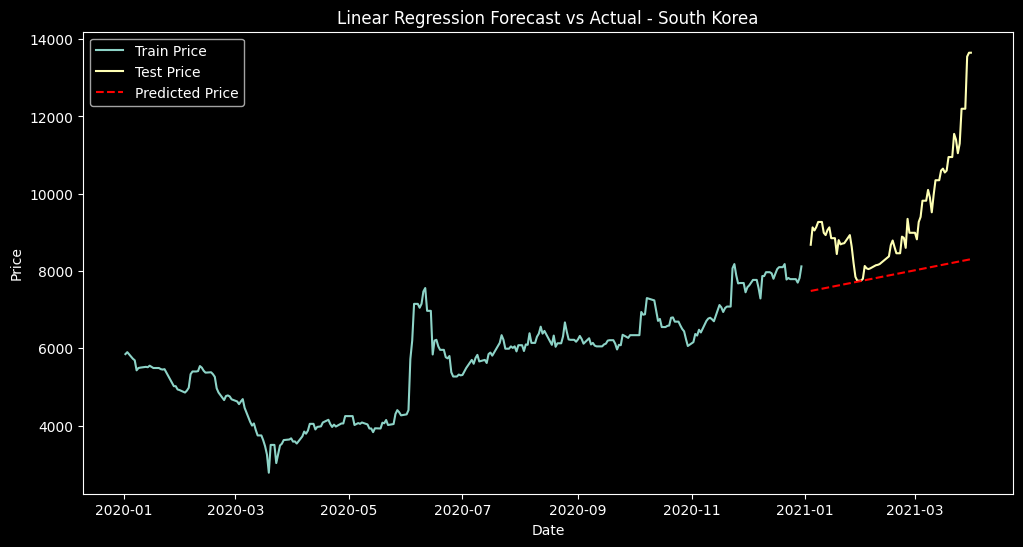

Mean Squared Error: 3911137.004509627
R^2 Score: -1.03405304347086


In [52]:
linear_regression_forecast(skorea, "South Korea")

In [53]:
#Splitting the data into training and testing. Training data is 2020 and Testing data is 2021.
# Split the data
train_russia = russia[russia['Year'] == 2020]
test_russia = russia[russia['Year'] == 2021]

ADF Statistic: -1.4233235279675986
p-value: 0.5710448680935893
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-824.252, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-672.794, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-727.416, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-674.794, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-758.889, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-827.984, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-829.684, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-828.025, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-729.415, Time=0.02

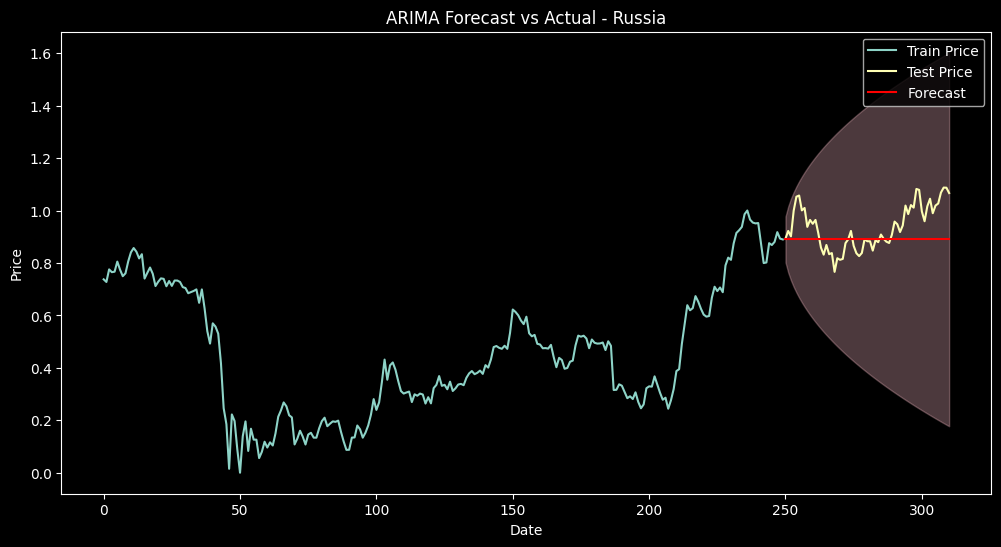

RMSE: 0.09539114878359817
MAPE: 7.681601589362119%


(0.09539114878359817, 0.07681601589362119)

In [54]:
arima(train_russia, test_russia, "Russia")

ADF Statistic: -1.524120867475299
p-value: 0.5215471446531426
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-819.520, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-667.362, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-724.419, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-669.361, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-818.823, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-817.642, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-763.216, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-822.248, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-823.985, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-822.279, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-726.414, 

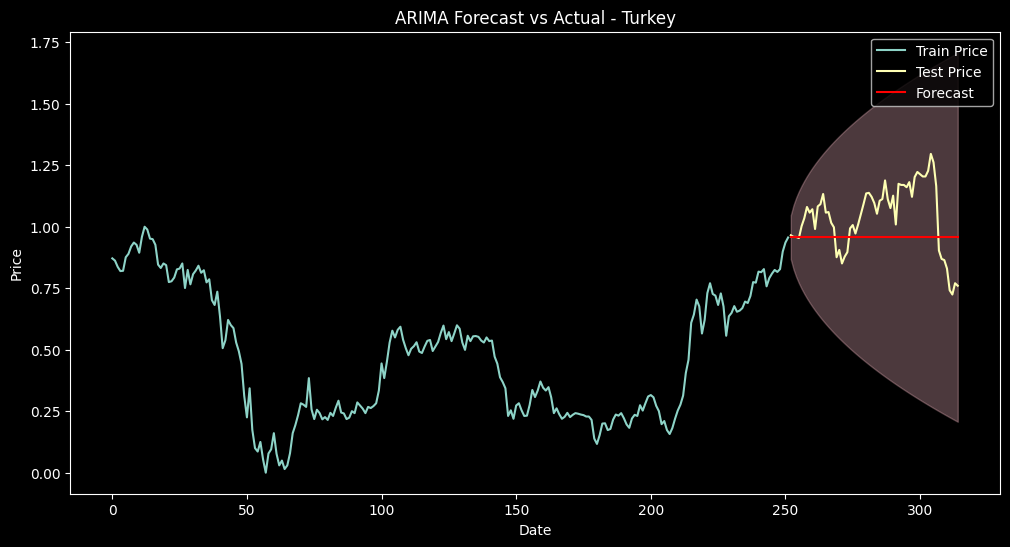

RMSE: 0.15922396060150124
MAPE: 12.854690616764882%


(0.15922396060150124, 0.12854690616764883)

In [55]:
train_turkey = turkey[turkey['Year'] == 2020]
test_turkey = turkey[turkey['Year'] == 2021]
arima(train_turkey, test_turkey, 'Turkey')

ADF Statistic: -1.542417678277975
p-value: 0.5124333991631931
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-793.410, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-827.126, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-795.357, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-839.237, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-851.955, Time=0.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-856.239, Time=0.40 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-860.433, Time=0.27 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-872.132, Time=0.52 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-878.806, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-886.700, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-889.504, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, 

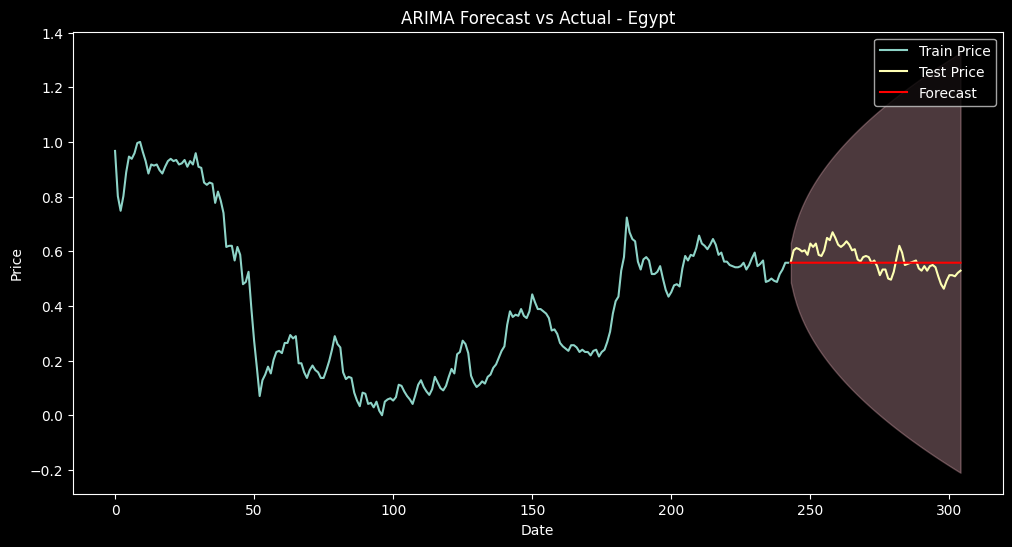

RMSE: 0.04824239864099044
MAPE: 7.001410756345037%


(0.04824239864099044, 0.07001410756345038)

In [56]:
train_egypt = egypt[egypt['Year'] == 2020]
test_egypt = egypt[egypt['Year'] == 2021]
arima(train_egypt, test_egypt, "Egypt")

ADF Statistic: -2.1956983927966975
p-value: 0.2078103950122735
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-602.897, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-706.077, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-604.894, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-758.596, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-763.158, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-762.039, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-793.811, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-789.029, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-781.775, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-787.046, Time

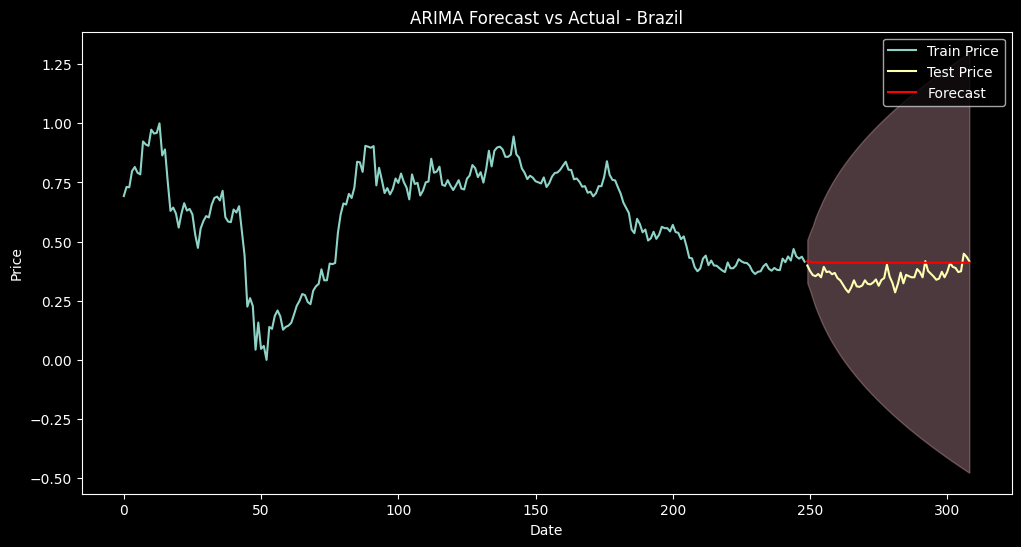

RMSE: 0.06581023094100993
MAPE: 17.491066239355984%


(0.06581023094100993, 0.17491066239355985)

In [57]:
train_brazil = brazil[brazil['Year'] == 2020]
test_brazil = brazil[brazil['Year'] == 2021]
arima(train_brazil, test_brazil, "Brazil")

ADF Statistic: -0.7426681664185698
p-value: 0.8353858829030218
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-672.204, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-756.372, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-674.204, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-771.244, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-791.994, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-799.803, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-802.913, Time=0.14 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-830.067, Time=0.49 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-822.931, Time=0.41 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-828.409, Time=0.60 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-831.135, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf,

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


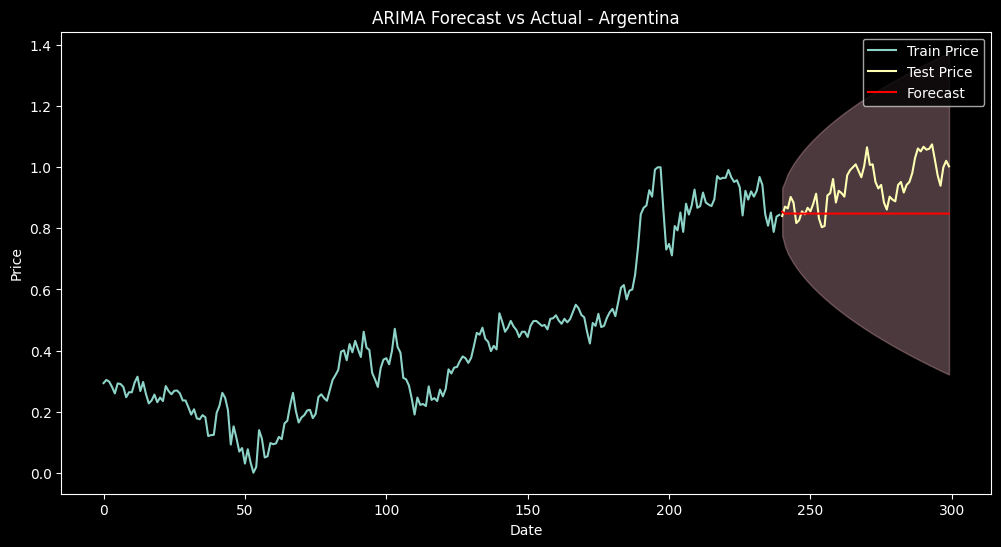

RMSE: 0.11762087332457898
MAPE: 9.899612480915339%


(0.11762087332457898, 0.09899612480915339)

In [58]:
train_argentina = argentina[argentina['Year'] == 2020]
test_argentina = argentina[argentina['Year'] == 2021]
arima(train_argentina, test_argentina, "Argentina")

ADF Statistic: -1.8521235185529443
p-value: 0.3549077427799207
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-789.409, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-864.380, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-791.408, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-881.453, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-904.315, Time=0.20 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-902.334, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-926.650, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-931.578, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-930.385, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-923.163, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-933.517,

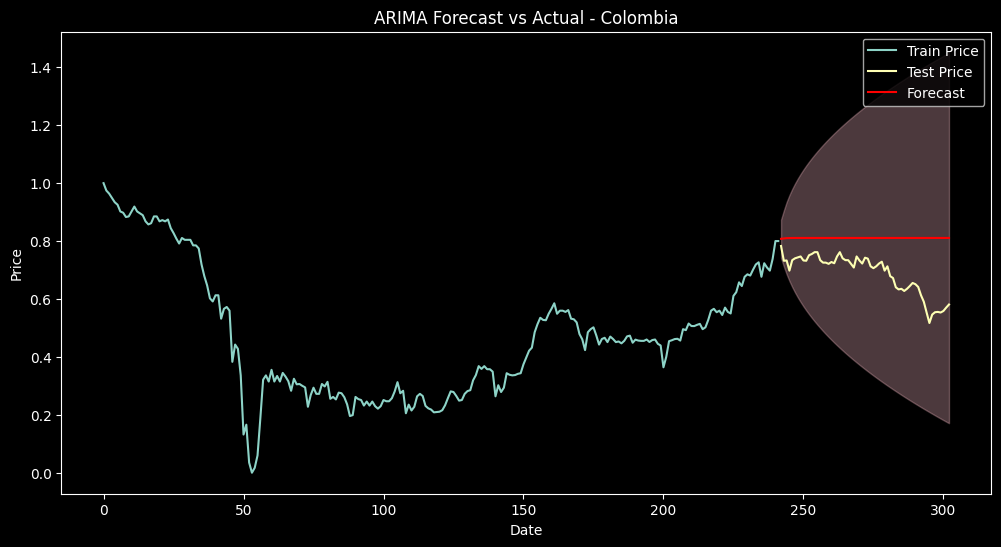

RMSE: 0.14186060570312264
MAPE: 19.37704901185925%


(0.14186060570312264, 0.1937704901185925)

In [59]:
train_colombia = colombia[colombia['Year'] == 2020]
test_colombia = colombia[colombia['Year'] == 2021]
arima(train_colombia, test_colombia, 'Colombia')

ADF Statistic: -0.9104458387885389
p-value: 0.7845129916264026
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-661.283, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-739.271, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-663.282, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-787.070, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-799.153, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-797.992, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-833.913, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-832.953, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-832.077, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-829.011, Time

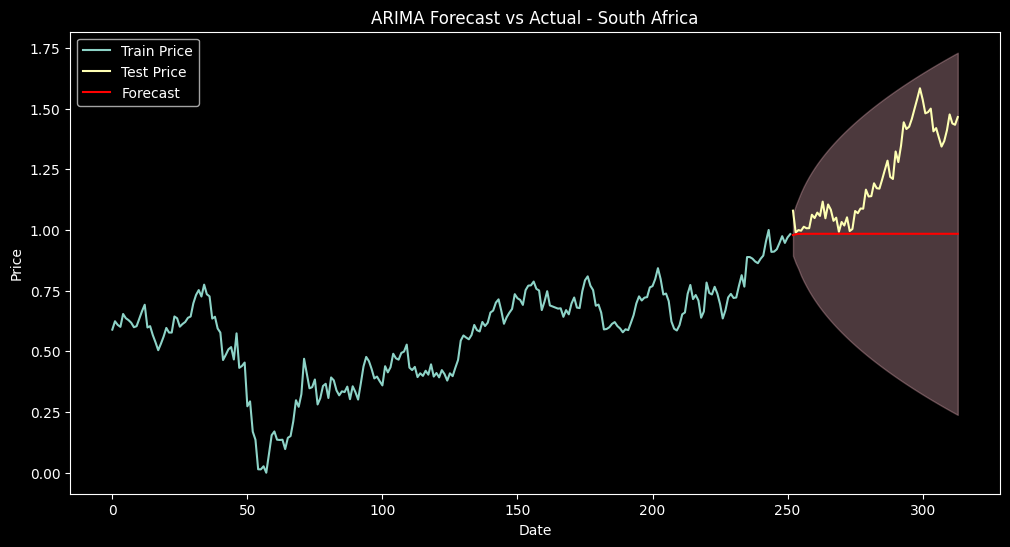

RMSE: 0.30215433607044345
MAPE: 17.68639271594545%


(0.30215433607044345, 0.17686392715945448)

In [60]:
train_safrica = safrica[safrica['Year'] == 2020]
test_safrica = safrica[safrica['Year'] == 2021]
arima(train_safrica, test_safrica, "South Africa")

ADF Statistic: -0.7325649461744604
p-value: 0.8381332296792272
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-798.172, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-881.673, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-800.169, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-902.331, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-916.708, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-926.105, Time=0.15 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-931.280, Time=0.23 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-954.938, Time=0.59 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-954.944, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-962.859, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time

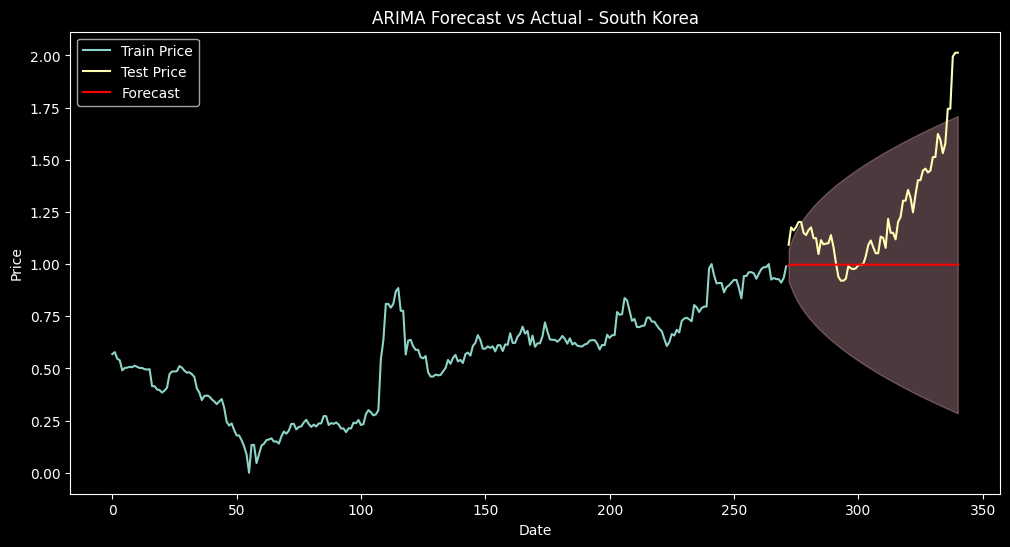

RMSE: 0.3512780670563263
MAPE: 17.50499917010833%


(0.3512780670563263, 0.1750499917010833)

In [61]:
train_skorea = skorea[skorea['Year'] == 2020]
test_skorea = skorea[skorea['Year'] == 2021]
arima(train_skorea, test_skorea, "South Korea")


##### The ARIMA (AutoRegressive Integrated Moving Average) and SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) models are both used for time series forecasting, but they have some key differences: ARIMA handles non-seasonal data, does not handle exogenous variables and is useful for simple, non-seasonal datasets. Whereas SARIMAX handles both seasonal and non-seasonal data, can incorporate exogenous variables (regressors) which can improve the forecast by including external information and is more flexible and powerful for complex datasets with seasonality and external factors.

In [62]:
#SARIMAX
sarimax_forecast(train_russia, test_russia, "Russia")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1499.638, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1501.228, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1501.180, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1497.685, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1502.372, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.796 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -747.842
Date:                Tue, 04 Jun 2024   AIC                           1497.685
Time:                        16:41:37   BIC                           1501.202
Sample:                             0   HQIC                          1499.101
               

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).